In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./East_std.csv')
print(df)

      Unnamed: 0   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0              0  0.016508         0.0       0.00        0.0        0.0   
1              1  0.011288         0.0       0.00        0.0        0.0   
2              2  0.024257         0.0       0.00        0.0        0.0   
3              3  0.008667         0.0       0.00        0.0        0.0   
4              4  0.057338         0.0       0.75        0.0        0.0   
...          ...       ...         ...        ...        ...        ...   
3994        3994  0.010837         0.0       0.00        0.0        0.0   
3995        3995  0.037766         0.0       0.00        0.0        0.0   
3996        3996  0.043169         0.0       0.50        0.0        0.0   
3997        3997  0.032202         0.0       0.00        0.0        0.0   
3998        3998  0.001769         0.0       0.00        0.0        0.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0        0.000660     0.01162

In [41]:
df.drop(['Award?'], axis=1, inplace=True)
print(df.columns)

KeyError: "['Award?'] not found in axis"

In [26]:
# number of clusters

no_of_clusters = np.arange(1,11)
wss = []
from sklearn.cluster import KMeans 
        # create the model for k number of clusters
for k in no_of_clusters:
    model = KMeans(n_clusters=k, random_state = 12345)
    #fit the data 
    model.fit(df)
    #collect the wss for elbow method 
    wss.append(model.inertia_)
print(wss)   #print the diff between the two points
    
    



[5329334898.270579, 1332337203.2633219, 592173251.0247321, 333137883.10640526, 213279397.25320914, 148121296.62987703, 108933814.13312687, 83358179.83460459, 65976579.499168806, 53497908.52697867]


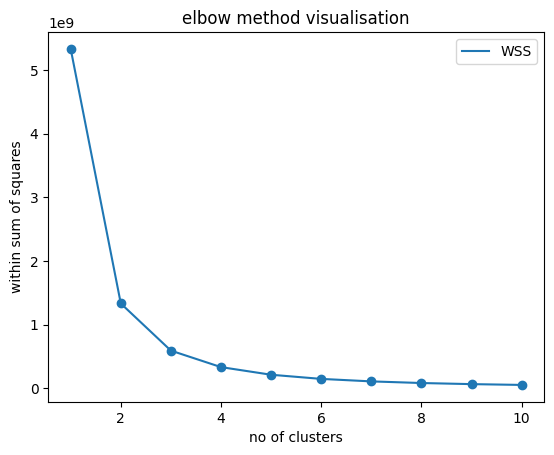

In [24]:
#plot a chart for elbow method 
plt.plot(no_of_clusters, wss, label = 'WSS')
plt.scatter(no_of_clusters, wss)
plt.xlabel("no of clusters")
plt.ylabel("within sum of squares")
plt.title("elbow method visualisation")
plt.legend()
plt.show()

In [28]:
#create the model 
from sklearn.cluster import KMeans 
#create an object of KMeans class
model = KMeans(n_clusters=4, random_state=12345)
model=model.fit(df)
a=model.labels_

In [29]:
print(a)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [31]:
ad=pd.DataFrame(a)
print(ad)

,0
0,1
1,1
2,1
3,1
4,1
...,...
3994,0
3995,0
3996,0
3997,0


In [43]:
fd=pd.concat([df,ad],axis=1)
print(fd)

      Unnamed: 0   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0              0  0.016508         0.0       0.00        0.0        0.0   
1              1  0.011288         0.0       0.00        0.0        0.0   
2              2  0.024257         0.0       0.00        0.0        0.0   
3              3  0.008667         0.0       0.00        0.0        0.0   
4              4  0.057338         0.0       0.75        0.0        0.0   
...          ...       ...         ...        ...        ...        ...   
3994        3994  0.010837         0.0       0.00        0.0        0.0   
3995        3995  0.037766         0.0       0.00        0.0        0.0   
3996        3996  0.043169         0.0       0.50        0.0        0.0   
3997        3997  0.032202         0.0       0.00        0.0        0.0   
3998        3998  0.001769         0.0       0.00        0.0        0.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0        0.000660     0.01162